In [0]:
import numpy as np
from scipy.io import wavfile
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
from tabulate import tabulate

### Linear Convolution

In [0]:
class DiscreteSignal:
  def __init__(self, l, r):
    self.l = l
    self.r = r
    self.x = [random.randint(-10,10) for _ in range(r-l+1)]
  def __repr__(self):
    return '{}'.format(tabulate([self.x], headers=[idx for idx in range(self.l,self.r+1)], tablefmt='orgtbl'))

In [0]:
def convolution(x_1, x_2):
  x = np.convolve(x_1.x, x_2.x,mode='full')
  signal = DiscreteSignal(x_1.l+x_2.l, x_1.r + x_2.r)
  signal.x = x
  return signal

In [0]:
x1, x2 = DiscreteSignal(-1,3) , DiscreteSignal(-2,2)

In [0]:
print(x1)

|   -1 |   0 |   1 |   2 |   3 |
|------+-----+-----+-----+-----|
|    3 | -10 |  10 |   1 |   0 |


In [0]:
print(x2)

|   -2 |   -1 |   0 |   1 |   2 |
|------+------+-----+-----+-----|
|    6 |    9 |  -9 | -10 |   1 |


In [0]:
print(convolution(x1,x2))

|   -3 |   -2 |   -1 |   0 |   1 |    2 |   3 |   4 |   5 |
|------+------+------+-----+-----+------+-----+-----+-----|
|   18 |  -33 |  -57 | 156 |  22 | -119 |   0 |   1 |   0 |


### DFT and IDFT

In [0]:
def dft(x):
  return np.fft.fft(x)

In [0]:
def idft(x):
  return np.fft.ifft(x)

### Circular Convolution using DFT and IDFT

In [0]:
def show_circular_convolution_result(x1,x2,x):
  sig1 = x1.tolist()
  sig2 = x2.tolist()
  sig = x.tolist()
  idx = [idx for idx in range(len(sig))]
  print(tabulate([sig1, sig2, sig], headers=idx,tablefmt='orgtbl'))

In [0]:
def circular_convoultion():
  # x1 = [random.randint(-10,10) for _ in range(4)]
  # x2 = [random.randint(-10,10) for _ in range(4)]
  x1 = np.array([2,1,2,1])
  x2 = np.array([1,2,3,4])
  X1 = dft(x1)
  X2 = dft(x2)
  X = X1 * X2
  x = np.array(np.abs(idft(X)),dtype=int)
  show_circular_convolution_result(x1, x2, x)

In [0]:
circular_convoultion()

|   0 |   1 |   2 |   3 |
|-----+-----+-----+-----|
|   2 |   1 |   2 |   1 |
|   1 |   2 |   3 |   4 |
|  14 |  16 |  14 |  16 |


### Linear Convolution using DFT and IDFT

In [0]:
def lin_convol_using_dft_idft(sig1, sig2):
  M = len(sig1)
  N = len(sig2)
  L = M + N - 1
  x1 = np.pad(sig1,(0,L-M))
  x2 = np.pad(sig2,(0,L-N))
  X1 = dft(x1)
  X2 = dft(x2)
  X = X1 * X2
  x = np.array(np.abs(idft(X)), dtype=int)
  return x

In [0]:
lin_convol_using_dft_idft([2,3,4,-1,2],[1,1,3])

array([ 2,  5, 13, 12, 13,  1,  6])

### Read, Plot, Play and DFT of a wav file

In [0]:
! wget https://storage.googleapis.com/deepmind-media/pixie/making-music/sample_1.wav

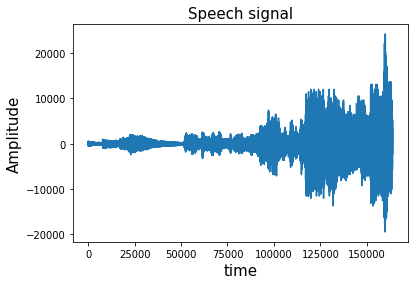

In [0]:
sample_rate, waveform = wavfile.read("sample_1.wav")
plt.plot(waveform)
plt.title('Speech signal', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.show() 
IPython.display.Audio(waveform, rate=sample_rate)

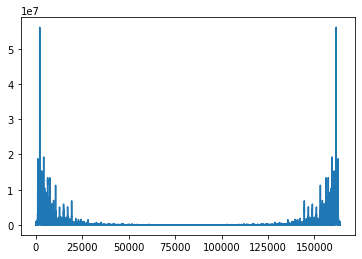

In [0]:
y = dft(waveform)
plt.plot(np.abs(y))
plt.show()

### Read, Display, Dft of a image

In [0]:
! wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [0]:
! tar -xvzf flower_photos.tgz

In [0]:
path = 'flower_photos/dandelion/16375088191_2bf2916b53.jpg'
img = cv2.imread(path,0)

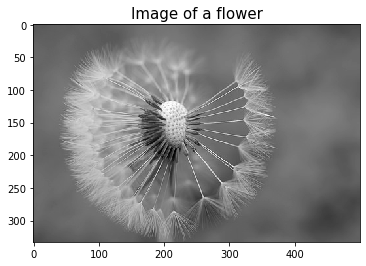

In [0]:
plt.imshow(img,cmap = 'gray')
plt.title('Image of a flower', fontsize=15)
plt.show()

In [0]:
img.shape

(333, 500)

In [0]:
print(img)

[[93 92 91 ... 80 80 80]
 [91 91 91 ... 80 80 80]
 [90 91 91 ... 80 80 80]
 ...
 [74 74 74 ... 97 97 97]
 [73 73 73 ... 97 97 97]
 [72 72 73 ... 97 97 97]]


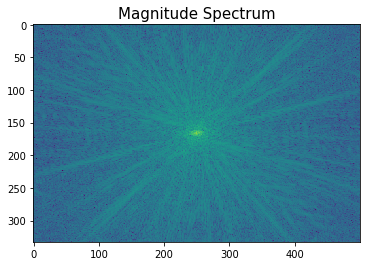

In [0]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.title('Magnitude Spectrum', fontsize=15)
plt.imshow(magnitude_spectrum)
plt.show()

### Cross Correlation

In [0]:
def cross_correlation(x1, x2):
  return np.correlate(x1,x2,"full")

In [0]:
cross_correlation([2,-1,3,7,1,2,-3],[1,-1,2,-2,4,1,-2,5])

array([ 10,  -9,  19,  36, -14,  33,   0,   7,  13, -18,  16,  -7,   5,
        -3])